# Temperature analysis program

In [1]:
from analysis import TemperatureDataAnalyzer
from seasons import Seasons
from holidays import Holidays
%matplotlib inline
file_path = "klementinum.xlsx"
analyzer = TemperatureDataAnalyzer(file_path)

## Base statistics

In [7]:
print(analyzer)

                rok         měsíc           den         T-AVG           TMA  \
count  90580.000000  90580.000000  90580.000000  90580.000000  90580.000000   
mean    1898.500729      6.523029     15.729344      9.764286     13.266869   
std       71.591284      3.448695      8.800017      8.333259      9.365293   
min     1775.000000      1.000000      1.000000    -24.800000    -21.500000   
25%     1836.750000      4.000000      8.000000      3.300000      5.600000   
50%     1898.500000      7.000000     16.000000      9.900000     13.500000   
75%     1960.250000     10.000000     23.000000     16.700000     21.000000   
max     2022.000000     12.000000     31.000000     31.900000     37.800000   

                TMI           SRA  
count  90580.000000  79837.000000  
mean       6.277493      1.292845  
std        7.557287      3.636872  
min      -27.600000      0.000000  
25%        1.000000      0.000000  
50%        6.400000      0.000000  
75%       12.600000      0.800000  


## Extremes of a year
Prints the hottest, coldest and rainiest days of the specified year

In [9]:
year = int(input("The requested year: "))
filter = analyzer.filter_year(year)
max_temp = analyzer.get_highest_temperature_date(filter_func=filter)
min_temp = analyzer.get_lowest_temperature_date(filter_func=filter)
max_rain = analyzer.get_highest_rainfall_date(filter_func=filter)
print(f"Max temperature of {year}: {max_temp[2]}. {max_temp[1]}. = {max_temp[3]} ˚C")
print(f"Max temperature of {year}: {min_temp[2]}. {min_temp[1]}. = {min_temp[3]} ˚C")
print(f"Max rain of {year}: {max_rain[2]}. {max_rain[1]}. = {max_rain[3]} mm")

The requested year:  1999


Max temperature of 1999: 5. 7. = 35.0 ˚C
Max temperature of 1999: 31. 1. = -13.2 ˚C
Max rain of 1999: 7. 6. = 31.0 mm


## Summary during a season
Prints the summary statistics during a specific season

In [3]:
season = int(input("Season (winter = 1, spring = 2, summer = 3, autumn = 4): "))
analyzer.summary_statistics(filter_func=analyzer.filter_season(Seasons(season)))

Season (winter = 1, spring = 2, summer = 3, autumn = 4):  2


,rok,měsíc,den,T-AVG,TMA,TMI,SRA
count,22816.00000,22816.00000,22816.000000,22816.000000,22816.000000,22816.000000,20087.000000
mean,1898.50000,4.00000,15.836957,9.536930,13.580422,5.482495,1.275546
std,71.59242,0.82094,8.854421,5.909967,6.758909,5.261949,3.452180
min,1775.00000,3.00000,1.000000,-15.200000,-9.000000,-27.600000,0.000000
25%,1836.75000,3.00000,8.000000,5.300000,8.700000,1.900000,0.000000
50%,1898.50000,4.00000,16.000000,9.500000,13.500000,5.500000,0.000000
75%,1960.25000,5.00000,23.250000,13.900000,18.500000,9.300000,0.900000
max,2022.00000,5.00000,31.000000,26.500000,32.800000,21.600000,56.200000


## Summary during a holiday
Prints the summary statistics during a specific holiday

In [9]:
holiday = int(input("New Year = 1, Easter = 2, Christmas = 3,  Halloween = 4): "))
analyzer.summary_statistics(filter_func=analyzer.filter_holiday(Holidays(holiday)))

New Year = 1, Easter = 2, Christmas = 3,  Halloween = 4):  3


,rok,měsíc,den,T-AVG,TMA,TMI,SRA
count,744.000000,744.0,744.000000,744.000000,744.000000,744.000000,657.000000
mean,1898.500000,12.0,25.000000,0.223118,2.217070,-1.862366,0.636986
std,71.639012,0.0,0.817046,4.951121,4.799346,5.303696,1.630479
min,1775.000000,12.0,24.000000,-21.200000,-19.600000,-24.800000,0.000000
25%,1836.750000,12.0,24.000000,-2.400000,-0.800000,-4.500000,0.000000
50%,1898.500000,12.0,25.000000,0.900000,2.650000,-0.700000,0.000000
75%,1960.250000,12.0,26.000000,3.400000,5.300000,1.600000,0.400000
max,2022.000000,12.0,26.000000,12.300000,14.600000,10.700000,15.500000


## Print statistical outliers
Prints the statistical outliers according to the specified z-value - outliers above this value get printed.

**Warning** - Data vary a lot - use high values (such as 3.8) for testing

In [14]:
z_score = float(input())
print("Average temperature")
print(analyzer.get_temperature_outliers(z_score))
print()
print("Rainfall")
print(analyzer.get_rainfall_outliers(z_score))

 3.8


Average temperature
        rok  měsíc  den  T-AVG   TMA   TMI  SRA Flag
3291   1784      1    5  -23.4 -19.0 -25.5  NaN  NaN
3292   1784      1    6  -23.0 -21.4 -25.4  NaN  NaN
3293   1784      1    7  -22.4 -19.6 -25.0  NaN  NaN
5120   1789      1    7  -23.2 -19.8 -25.1  NaN  NaN
5121   1789      1    8  -23.2 -20.0 -25.4  NaN  NaN
27414  1850      1   22  -24.8 -21.5 -26.8  0.0  NaN

Rainfall
        rok  měsíc  den  T-AVG   TMA   TMI   SRA Flag
10736  1804      5   25   18.1  21.9  15.4  20.7  NaN
10750  1804      6    8   19.5  24.0  16.9  19.1  NaN
10754  1804      6   12   13.4  14.9  12.4  24.4  NaN
10755  1804      6   13   12.7  13.7  11.8  17.8  NaN
10756  1804      6   14   13.8  15.2  11.7  19.7  NaN
...     ...    ...  ...    ...   ...   ...   ...  ...
90431  2022      8    5   28.3  34.0  19.9  17.6  NaN
90445  2022      8   19   22.2  29.7  20.0  36.8  NaN
90446  2022      8   20   18.0  20.5  17.8  25.7  NaN
90452  2022      8   26   22.3  29.5  19.6  20.3  NaN
90522

## Plot rainfall mean over the years
This plots the rainfall over specified number of years with option to limit the years in question.

Do you want to limit the years? (y/N):  
Do you want to smooth over multiple years? (y/N):  


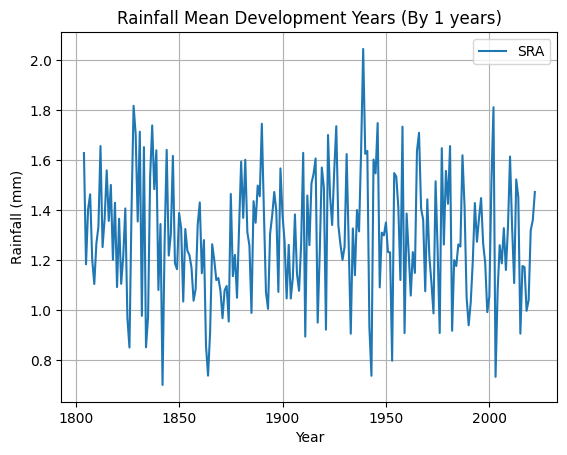

In [10]:
limit = input("Do you want to limit the years? (y/N): ")
filter = None
years = 1
if limit.upper() == "Y":
    start_year = int(input("Start year: "))
    end_year = int(input("End year: "))
    filter = analyzer.filter_year(start_year, end_year)
smooth = input("Do you want to smooth over multiple years? (y/N): ")
if smooth.upper() == "Y":
    years = int(input("Input over how many years: "))
analyzer.plot_rainfall_mean_development_years(number_of_years=years, filter_func=filter)

## Plot temperature over the months
This plots the temperature over the months with option to limit the years

Do you want to limit the years? (y/N):  


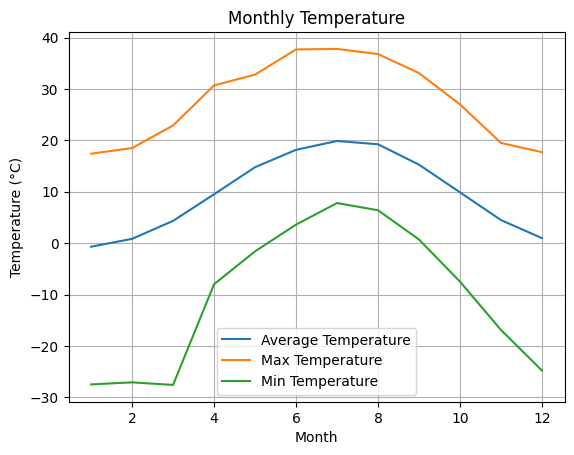

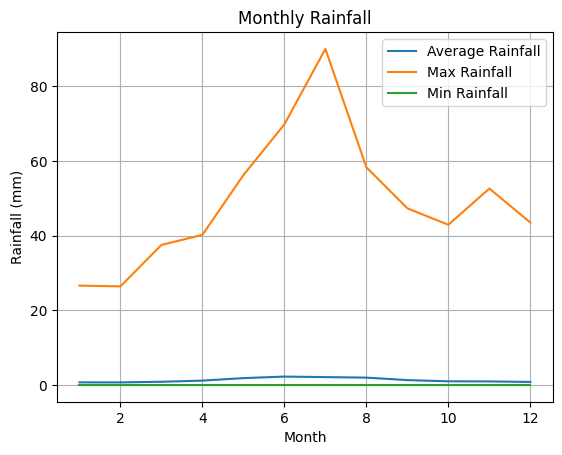

In [5]:
limit = input("Do you want to limit the years? (y/N): ")
filter = None
if limit.upper() == "Y":
    start_year = int(input("Start year: "))
    end_year = int(input("End year: "))
    filter = analyzer.filter_year(start_year, end_year)
analyzer.plot_monthly_all_temperature(filter)
analyzer.plot_monthly_all_rainfall(filter)

## Plot day averages
This plots the statistics for days

Do you want to limit the months and years? (y/N):  y
Start month:  1
End month:  5
Start year:  1990
End year:  2000


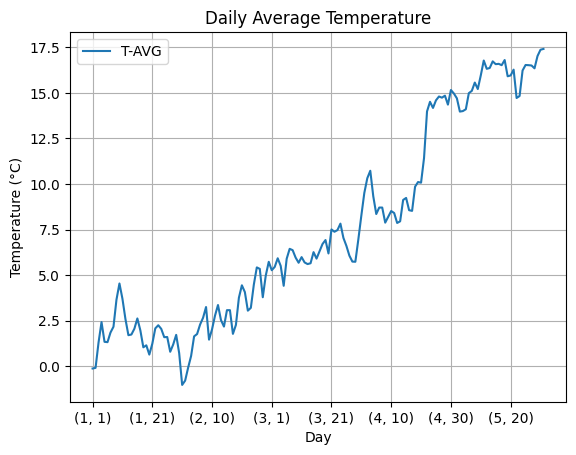

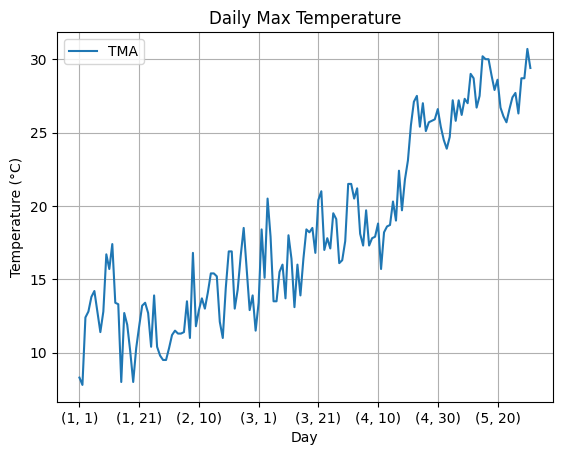

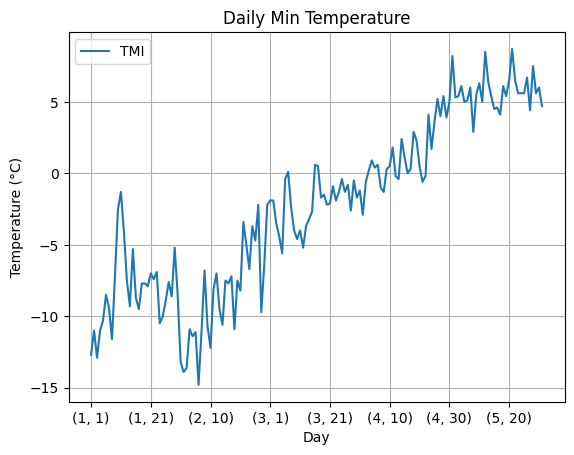

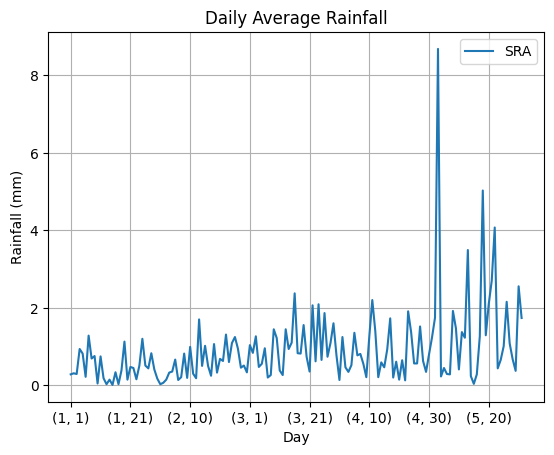

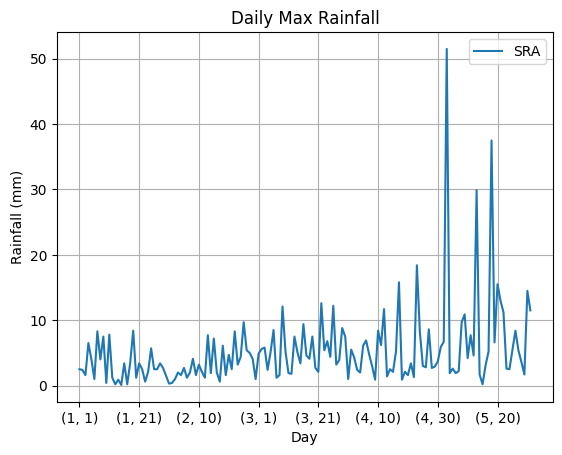

In [6]:
limit = input("Do you want to limit the months and years? (y/N): ")
filter = None
if limit.upper() == "Y":
    start_month = int(input("Start month: "))
    end_month = int(input("End month: "))
    start_year = int(input("Start year: "))
    end_year = int(input("End year: "))
    filter = analyzer.filter_month_year(start_month, start_year, end_month, end_year)
analyzer.plot_day_of_month_avg_temperature(filter_func=filter)
analyzer.plot_day_of_month_max_temperature(filter_func=filter)
analyzer.plot_day_of_month_min_temperature(filter_func=filter)
analyzer.plot_day_of_month_avg_rainfall(filter_func=filter)
analyzer.plot_day_of_month_max_rainfall(filter_func=filter)


# Plot for days of holidays
Plots the statistics for the requested holiday days

New Year = 1, Easter = 2, Christmas = 3,  Halloween = 4):  4


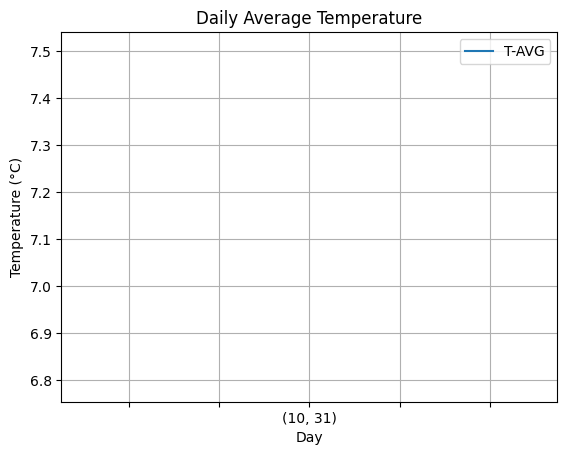

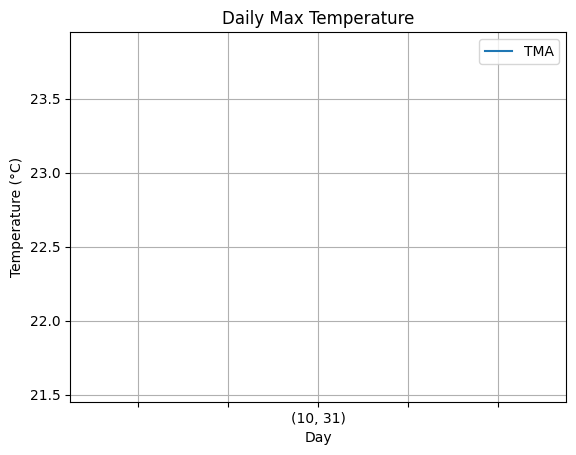

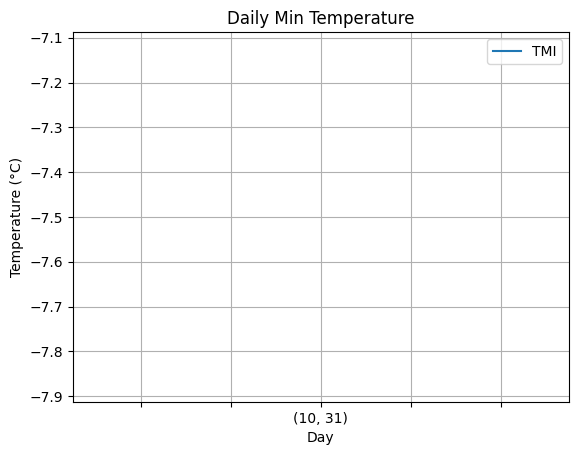

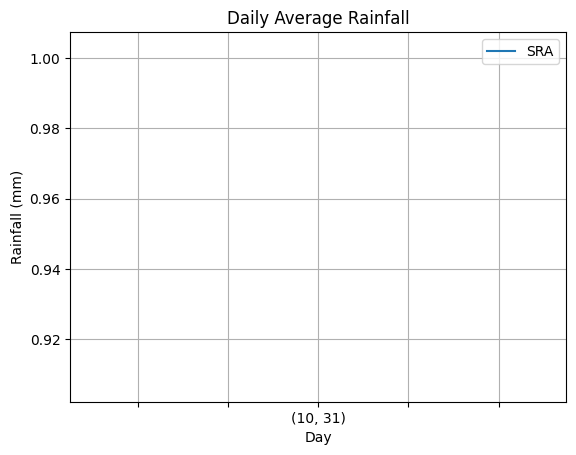

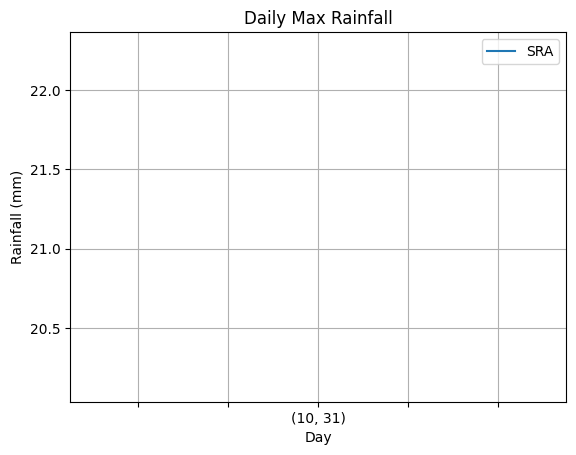

In [12]:
holiday = int(input("New Year = 1, Easter = 2, Christmas = 3,  Halloween = 4): "))
filter = analyzer.filter_holiday(Holidays(holiday))
analyzer.plot_day_of_month_avg_temperature(filter_func=filter)
analyzer.plot_day_of_month_max_temperature(filter_func=filter)
analyzer.plot_day_of_month_min_temperature(filter_func=filter)
analyzer.plot_day_of_month_avg_rainfall(filter_func=filter)
analyzer.plot_day_of_month_max_rainfall(filter_func=filter)

# Plot for seasons
Plots the statistics for the requested seasons

Season (winter = 1, spring = 2, summer = 3, autumn = 4):  2


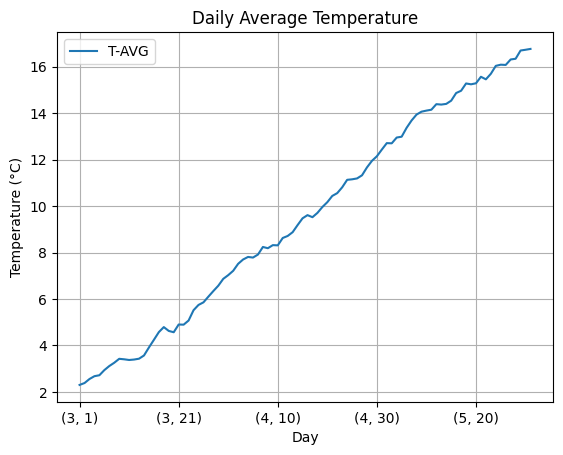

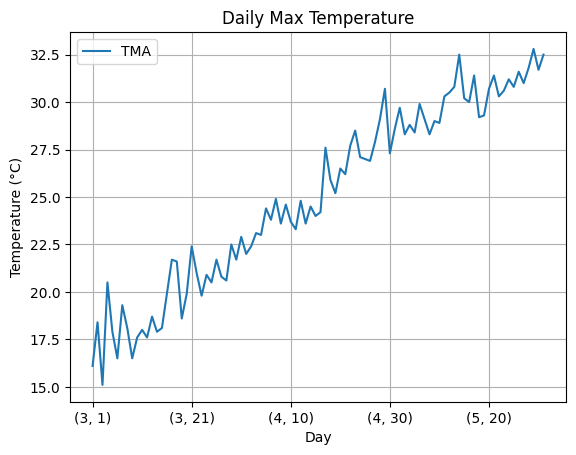

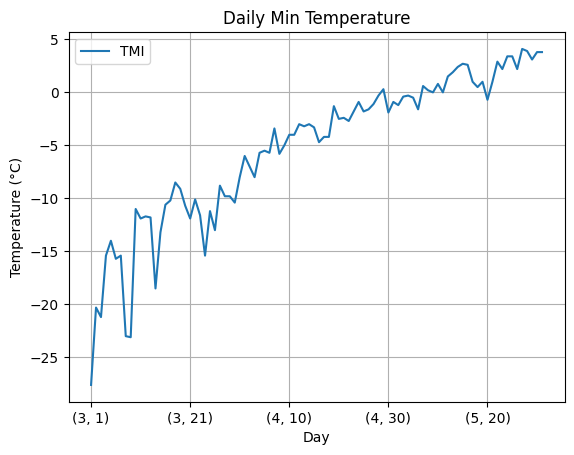

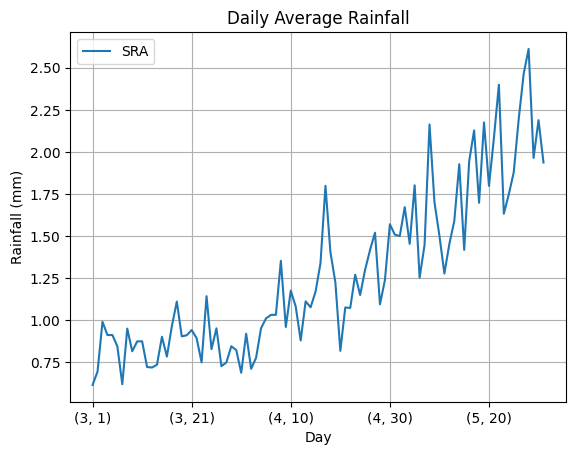

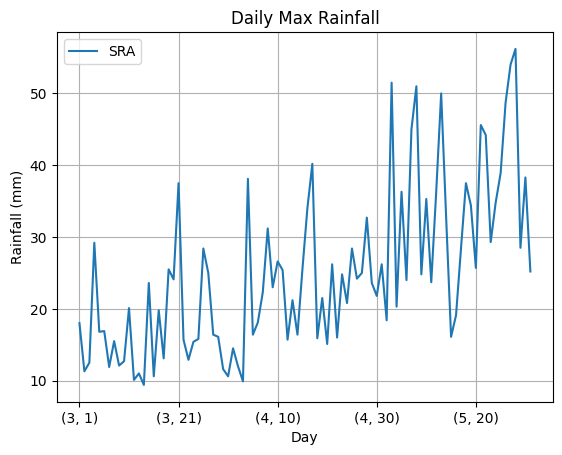

In [15]:
season = int(input("Season (winter = 1, spring = 2, summer = 3, autumn = 4): "))
filter = analyzer.filter_season(Seasons(season))
analyzer.plot_day_of_month_avg_temperature(filter_func=filter)
analyzer.plot_day_of_month_max_temperature(filter_func=filter)
analyzer.plot_day_of_month_min_temperature(filter_func=filter)
analyzer.plot_day_of_month_avg_rainfall(filter_func=filter)
analyzer.plot_day_of_month_max_rainfall(filter_func=filter)